#DHcode.org | Strings
### An introduction to computational digital humanities research by Wendy Norris

### Import a Python library

Again, and throughout this series, we'll use the Pandas library to import pre-built snippets of Python code for our data analysis.

In [1]:
import pandas as pd

### Read a sample of 1,000 tweets from the month of September

Let's read-in the refugee sample data in csv format into our Jupyter Notebook file. Here, we direct the Pandas library to read the csv file and convert it into a 2-dimensional (rows and columns) spreadsheet-like format called a dataframe, abbreviated here as **df**

In [2]:
df = pd.read_csv("refugee-data.csv")

### Convert the Twitter csv file into a dataframe called df. Look at the first 3 rows to confirm it imported properly.

In Pandas, the **.head( )** command directs Python to return the column name headers and the first five rows of the dataframe so we can eyeball it to make sure the data imported correctly. If there is a lot of data, the dataframe will also include a horizontal scroll bar, like we have below. 

In [3]:
df.head()

,coordinates,created_at,followers,friends,geolocation,id,original_text,text,tweet_type,user_id,user_location,user_name,user_screen_name,verified
0,NaN,2015-09-03 00:29:28+00:00,1812,1648,NaN,6.390000e+17,I spent the day at a Greek refugee camp: http:...,RT @VICEUK: I spent the day at a Greek refugee...,share,1000008756,NaN,nica,stylespedreiro,False
1,NaN,2015-09-13 20:30:14+00:00,1233,564,NaN,6.430000e+17,the subtle lumping of the liberal-minded refug...,RT @adamjohnsonNYC: the subtle lumping of the ...,share,1000010898,NaN,Roy Scranton,RoyScranton,False
2,NaN,2015-09-12 16:39:39+00:00,7860,1243,NaN,6.430000e+17,NaN,Kurdish Yezidi girl declines asylum offer from...,post,100001518,Jerusalem / Diyarbakir,Kurdistan & Israel,KurdistanIsrael,False
3,NaN,2015-09-03 06:15:17+00:00,327,161,NaN,6.390000e+17,"""Humanity washed ashore""- #KiyiyaVuranInsanlik...","RT @ajplus: ""Humanity washed ashore""- #KiyiyaV...",share,1000394742,NaN,Sadiyya Badat,SadiyyaBadat,False
4,NaN,2015-09-05 22:10:18+00:00,451,1082,NaN,6.400000e+17,Aylan Kurdi must bring West to its senses. Kur...,RT @BayanRahman: Aylan Kurdi must bring West t...,share,100027392,Manchester,Karimah Farag,KarimahSamiah,False


### Let's narrow the data to a subset consisting of only the columns we're interested in exploring further 

As we did in the datatypes Jupyter Notebook, we're going to create a new subset of the dataframe. We'll call it **subset_df** in order to be as descriptive as possible so we know it's not the entire dataframe.  Then, we'll write out the strings for each of the column headers in the dataframe that we're interested in. Notice, if you compare this subset and the full dataframe above, that the column headers do not need to be in the same order. 

Again, we'll run the **.head( )** command on the new **subset_df** dataframe to confirm the first five rows are displaying the way we expect. 

In [4]:
subset_df = df[["user_screen_name", "tweet_type", "text", "friends", "followers"]]
subset_df.head(3)

,user_screen_name,tweet_type,text,friends,followers
0,stylespedreiro,share,RT @VICEUK: I spent the day at a Greek refugee...,1648,1812
1,RoyScranton,share,RT @adamjohnsonNYC: the subtle lumping of the ...,564,1233
2,KurdistanIsrael,post,Kurdish Yezidi girl declines asylum offer from...,1243,7860


### Write a string to describe the original (posts) vs retweets (shares) count

As we did in the previous video, let's count the total number of **tweet_types** or shared and original posts in the Twitter dataset. We'll use the variable **kind** to label this short program.

But in this case, we're also going to add a string to the **print** statement to be a bit more descriptive about the calculated data that we're returning. Having more elaborate **print** statements are very helpful for understanding the underlying decisions you've made in the program to refresh your memory when you come back to a program as well as to share those analytical choices with others. 

In [5]:
kind = subset_df["tweet_type"].value_counts()
print("The total number of tweet types in the data is: ")
print(kind)

The total number of tweet types in the data is: 
share    640
post     357
Name: tweet_type, dtype: int64


### Concatenate two simple strings

In this example, we concatenate or join two strings together. One is the text of a tweet and the other is a Twitter generated link. Notice when I concatenate the two strings **twt** and **link** as **full_tweet** I need to cheat in a space between them with an empty double quotemark. Otherwise, **full_tweet** would print squashed together, as **Childrenhttp://t.co/toxqLa8rZS**

Remember that an apostrophes inside a string can trip up Python and cause an invalid syntax error in the program. That's why I always recommend using double quotes to set off a string. Check out the two examples below to see what happens. 

In [6]:
twt = 'The World's Most Humble President Just Opened His House to 100 Syrian Refugee Children' 
link = "http://t.co/toxqLa8rZS" 

full_tweet = twt + " " + link
print(full_tweet)

SyntaxError: invalid syntax (<ipython-input-6-34f61a8895ea>, line 1)

In [7]:
twt = "The World's Most Humble President Just Opened His House to 100 Syrian Refugee Children"
link = "http://t.co/toxqLa8rZS" 

full_tweet = twt + " " + link
print(full_tweet)

The World's Most Humble President Just Opened His House to 100 Syrian Refugee Children http://t.co/toxqLa8rZS


### Concatenate a new mini-dataframe from two columns: user_screen_name and text

We can also concatenate two (or more) strings that represent column labels.

In [8]:
df_tweets = subset_df[["user_screen_name"] + ["text"]]
df_tweets.head()

,user_screen_name,text
0,stylespedreiro,RT @VICEUK: I spent the day at a Greek refugee...
1,RoyScranton,RT @adamjohnsonNYC: the subtle lumping of the ...
2,KurdistanIsrael,Kurdish Yezidi girl declines asylum offer from...
3,SadiyyaBadat,"RT @ajplus: ""Humanity washed ashore""- #KiyiyaV..."
4,KarimahSamiah,RT @BayanRahman: Aylan Kurdi must bring West t...


### Count all the instances of the string "refugee" in the tweets.

Incorporating strings inside a **print** statement can be a quite helpful way to describe the calculation that results from a program. In this example, we wrap two **print** statements around the number that is outputted from the count of the word "refugee" in all of the tweets. 

Notice here that we need to cast that integer from the count as a string by using **str(ref_total)** because **print** statements can only handle one datatype at a time. 

In [9]:
ref_total = df_tweets.text.str.count("refugee").sum()

print("The word 'refugee' appears: " + str(ref_total) + " times in this 1,000 tweet sample.")

The word 'refugee' appears: 542 times in this 1,000 tweet sample.


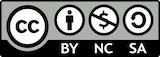